# Introduction to Data Visualization with Seaborn  - Neerja Doshi
### Data file : graduates.csv
This file contains information about students graduating from American institutes for 11 years between 1993 and 2015. For every year and Major of graduation, there is information about the distribution in terms of race, employment status, employment sector, etc.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('graduates.csv')
df.head()

,Accounting/Finance/Contracts,Applied Research,Asians,Bachelors,Basic Research,Business/Industry,Career Change,Computer Applications,Design,Development,...,"Sales, Purchasing, Marketing",Standard Deviation,Student,Teaching,Total,Unemployed,Whites,Work Activity.Other,Working Conditions,Year
0,793888,341238,84495,671374,224277,669270,98112,297235,118772,191867,...,215169,297818.25,51891,381908,1295598,22803,1094775,99749,100886,1993
1,95346,65810,27531,125883,25328,150692,11081,67868,82344,76108,...,44780,245705.77,2154,17718,211875,3647,173067,16361,6025,1993
2,240410,170327,49984,243247,95221,279775,36072,126471,81772,123256,...,78059,276000.33,9453,104191,507616,11437,421911,35007,24843,1993
3,197407,68530,37295,235237,34892,186818,12002,123613,133430,62031,...,73133,259543.49,2477,26892,336366,8163,281442,37940,9580,1993
4,484716,239183,83826,746586,131348,665249,59302,640201,251941,200490,...,168404,269323.82,10210,234507,1070111,28925,887476,62482,56745,1993


In [3]:
new_majors = df['Major'][df['Asians'] == 0].unique()
new_majors
df = df[~df.Major.isin(new_majors)]
# df.nunique()

major_df = df.groupby(['Major']).sum().reset_index()
# major_df.head().T

There were some Majors that did not exist before 2010, thus, their values are 0 in all the other years. Going further, those major have been excluded from analysis.

### 1. Most to least studied majors - Boxplot
First, here is a look at the number of student pursuing a particular Major over the years from 1993-2015. From the boxplot below, it is evident that Pyschology was the most favoured major while Chemical Engineering, Physics and Astronomy were the least studied. Also, the deviation in the number of graduates in Psychology, Biological Sciences and Computer Science and Math is quite high from year to year.

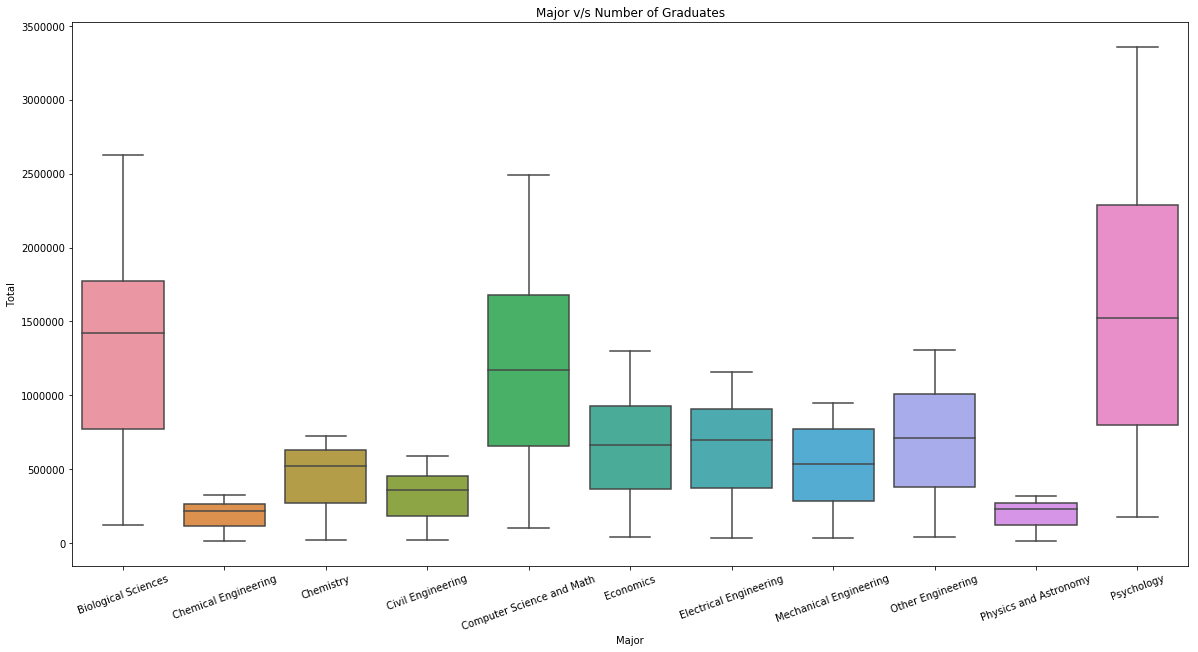

In [4]:
plt.figure(figsize=(20,10))
g = sns.boxplot(x="Major", y="Total",data=df)

g.set_xticklabels(g.get_xticklabels(),rotation=20)
plt.title('Major v/s Number of Graduates')
plt.show() 

### 2. Unemployment over the years - Barplot
From the bar plot below, we can see that for all the majors, unemployment is the lowest in the years from 2001-2008 (except 2003), but it increases after 2010. 2003 is one year in which all the Majors had a sudden spike in unemployment. While the reason for this spike is unclear, it is in keepng with the fact that in 2003, unemployment rate in the US had gone up to 5.8% with 308,000 job cuts.

Psychology has a huge number of unemployed graduates. The number of unemployed graduates there is almost double that of some of the other Majors.

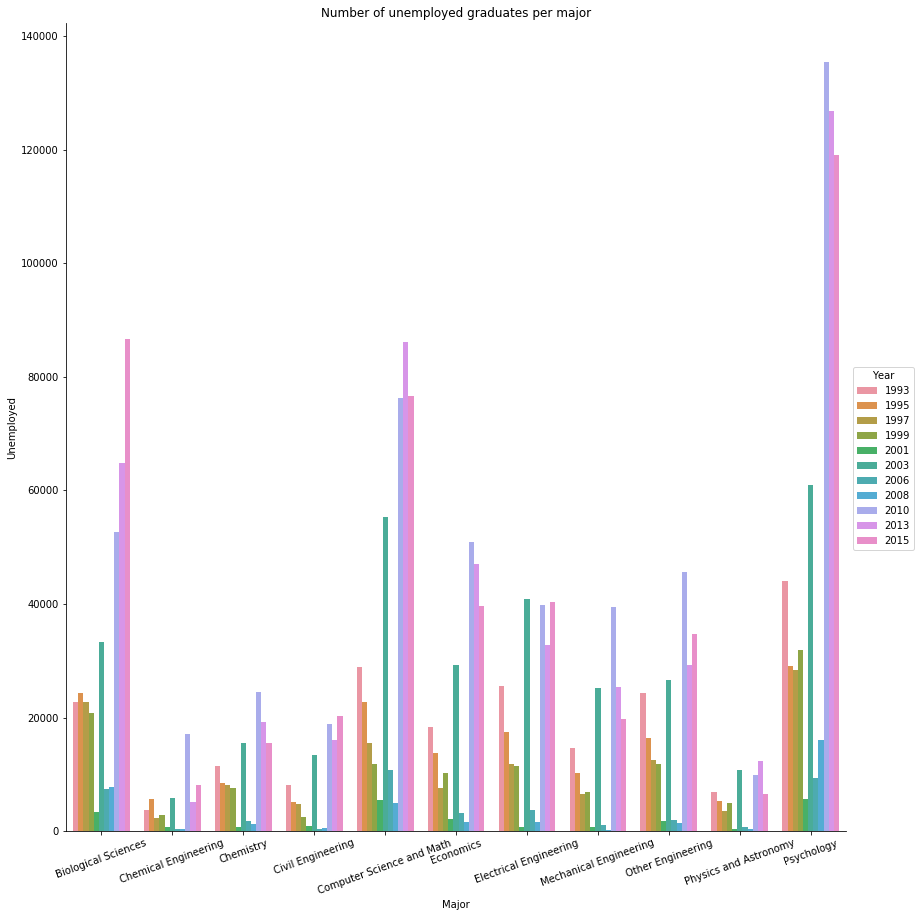

In [5]:
plt.figure(figsize=(20,10))
g = sns.factorplot(x="Major", y="Unemployed", data=df, size=12, kind="bar",hue = 'Year')
g.set_xticklabels(rotation=20)
plt.title('Number of unemployed graduates per major')
plt.show()

### 3. Employment Rate - Scatterplot (Multivariate)
From the scatterplot below, we can see the emplyment rate for every major over the years. As we can see, the years 2001, 2006 and 2008 had a high proportion of graduates who got employed whereas 2010 onwards, employment rate reduced quite a bit. 

In [6]:
df['Employment Rate'] = df['Employed']/df['Total']
df.head()

,Accounting/Finance/Contracts,Applied Research,Asians,Bachelors,Basic Research,Business/Industry,Career Change,Computer Applications,Design,Development,...,Standard Deviation,Student,Teaching,Total,Unemployed,Whites,Work Activity.Other,Working Conditions,Year,Employment Rate
0,793888,341238,84495,671374,224277,669270,98112,297235,118772,191867,...,297818.25,51891,381908,1295598,22803,1094775,99749,100886,1993,0.841970
1,95346,65810,27531,125883,25328,150692,11081,67868,82344,76108,...,245705.77,2154,17718,211875,3647,173067,16361,6025,1993,0.822230
2,240410,170327,49984,243247,95221,279775,36072,126471,81772,123256,...,276000.33,9453,104191,507616,11437,421911,35007,24843,1993,0.800970
3,197407,68530,37295,235237,34892,186818,12002,123613,133430,62031,...,259543.49,2477,26892,336366,8163,281442,37940,9580,1993,0.856915
4,484716,239183,83826,746586,131348,665249,59302,640201,251941,200490,...,269323.82,10210,234507,1070111,28925,887476,62482,56745,1993,0.876660


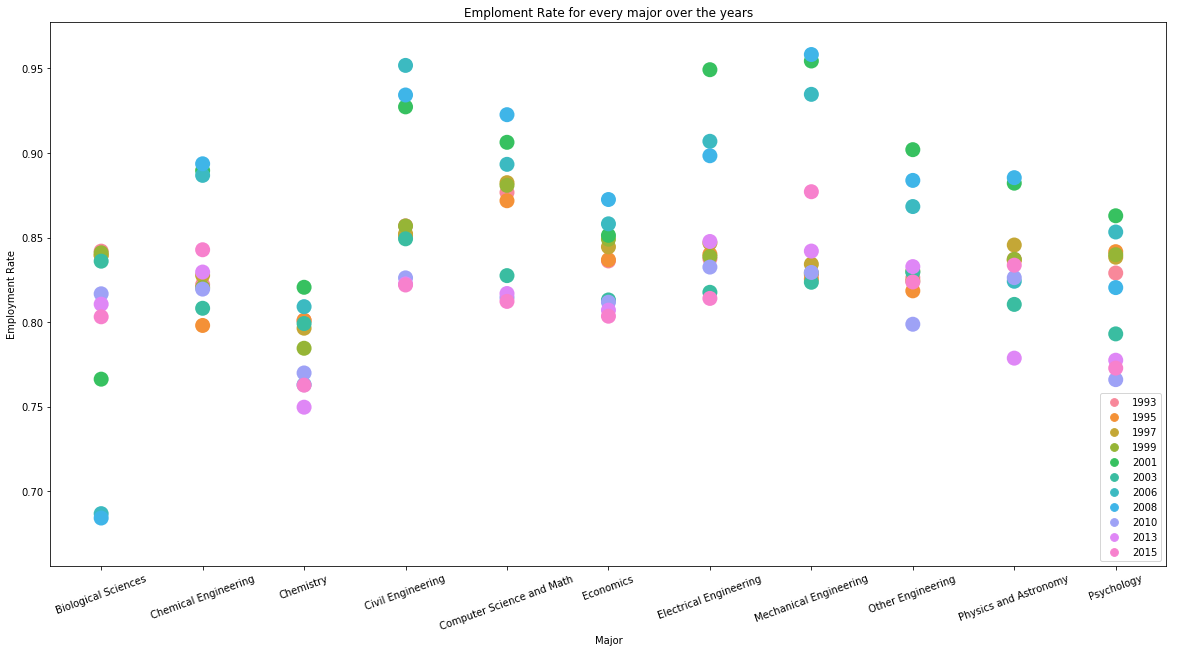

In [7]:
plt.figure(figsize=(20,10))
g = sns.stripplot(x="Major", y="Employment Rate",hue = 'Year', data=df, size = 15)
g.set_xticklabels(g.get_xticklabels(),rotation=20)
plt.legend(loc = 'lower right')
plt.title('Emploment Rate for every major over the years')
plt.show()

### 4. Distribution of Employment Rate pre and post 2003 - Violin plot

In the plot below, it can be seen that post 2003, the median employment rate is slightly lower than pre 2003. Also the deviation of employment rate over the years is higher post 2003 for almost all the Majors, especially Biological Sciences, Civil Engineering and Mechanical engineering. 

In [8]:
f = lambda x: 'new' if x.Year > 2003 else 'old'
dfc = df.copy()
dfc['old_new'] = dfc.apply(f, axis=1)

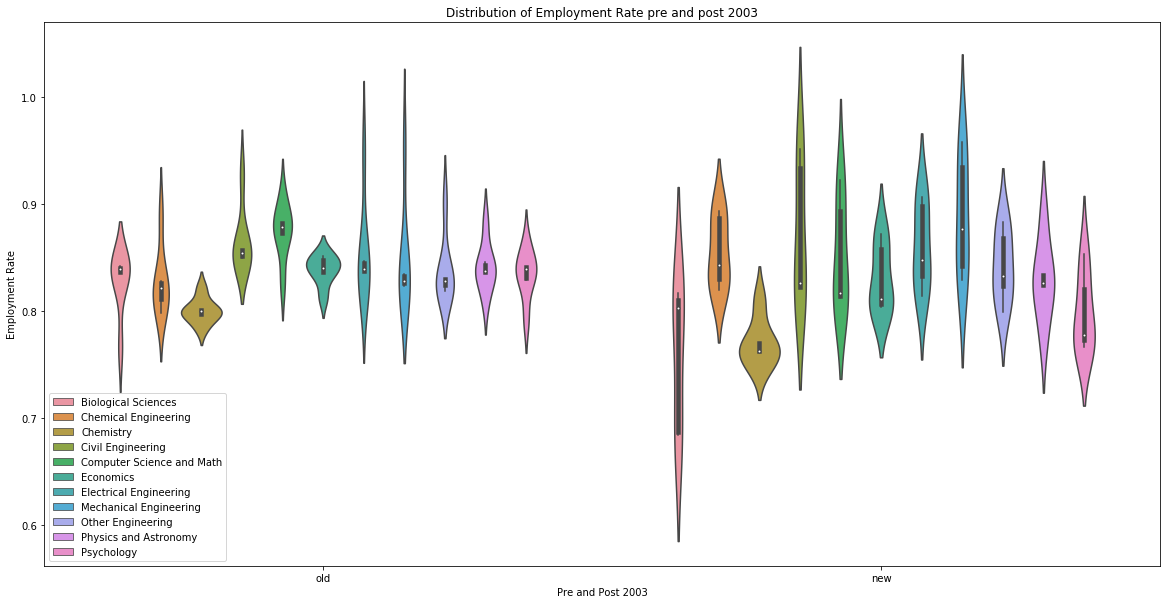

In [9]:
plt.figure(figsize=(20,10))
g = sns.violinplot(x="old_new", y="Employment Rate", data=dfc, hue = 'Major');
plt.legend(loc = 'lower left')
plt.title('Distribution of Employment Rate pre and post 2003')
plt.xlabel('Pre and Post 2003')
plt.show()

### 5. Major v/s Male:Female Ratio - Scatterplot (Bivariate)
From the scatterplot below, it is evident that the male to female ratio is least for Psychology Biological Sciences while it is the highest for Mechanical engineering, followed by Electrical Engineering.

In [10]:
df['Gender Ratio'] = df['Males']/df['Females']
major_df['Gender Ratio'] = major_df['Males']/major_df['Females']

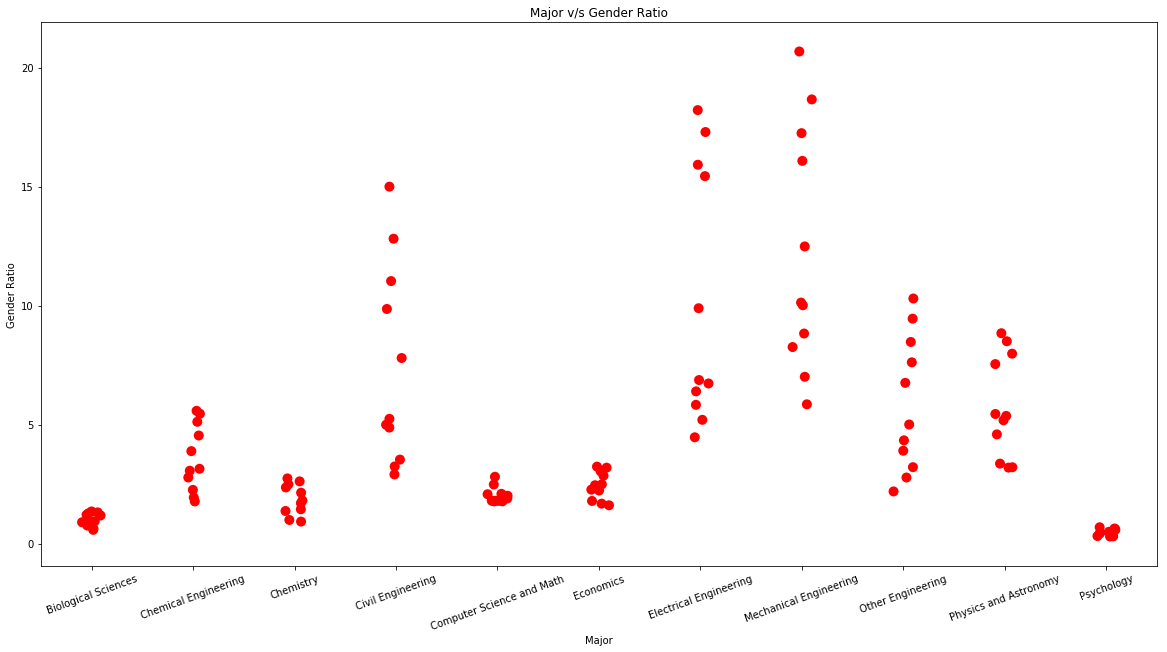

In [11]:
plt.figure(figsize=(20,10))
g = sns.stripplot(x="Major", y='Gender Ratio', data=df,color = 'red',  size = 10, jitter = True)
g.set_xticklabels(g.get_xticklabels(),rotation=20)
plt.title('Major v/s Gender Ratio')
plt.show()

### 6. Year v/s Gender - Linear Regression plot

In [12]:
df1 = df[['Major', 'Year', 'Males', 'Females']]
df1 = pd.melt(df1, ['Major', 'Year'], var_name="Gender")

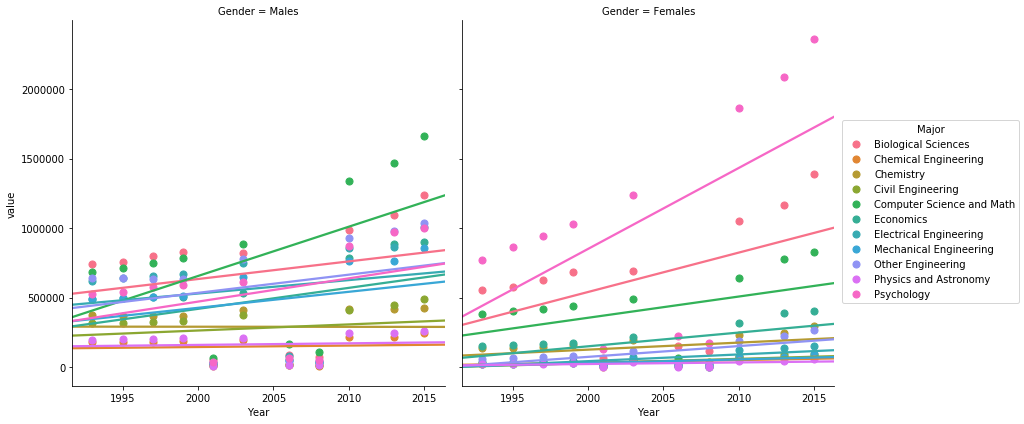

In [13]:
plt.figure(figsize=(20,10))
sns.lmplot(x="Year", y="value", col="Gender", hue="Major", data=df1,
           col_wrap=2, ci=None, palette="husl", size=6, 
           scatter_kws={"s": 50, "alpha": 1})
plt.show()

From this, it is evident that there is an initially there are more number of males than females, but the rate of increase in number of females, post 1999 is much higher than the increase in number of males, especially in Computer Science and Math, Biological Sciences and Psychology.

### 7. Distribution of race for every major - Swarmplot
Also, as can be seen from the plots below, the number of Asians and Minorities graduating from American instititutes has been increasing considerably over the years. The number of Asians in particular has increased significantly in the field of Computer Science and Math while the number of minorities has increased significantly in Psychology.

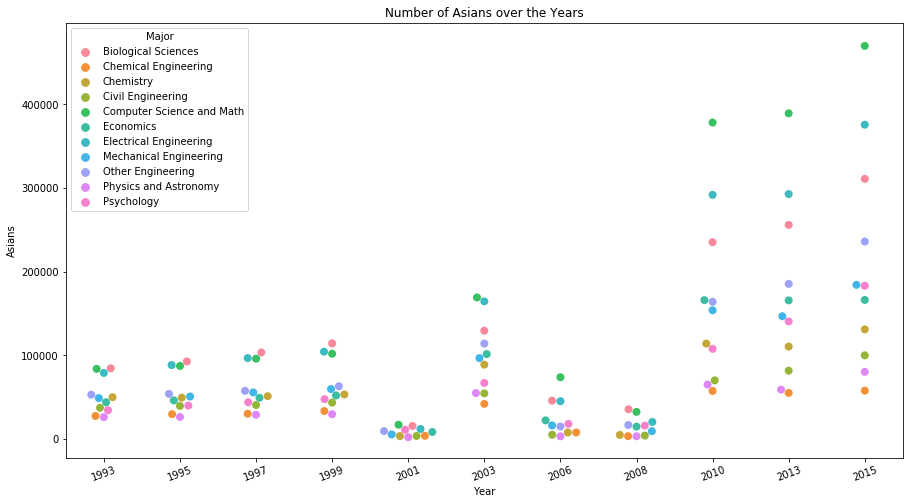

In [14]:
plt.figure(figsize = (15,8))
g = sns.swarmplot(x="Year", y="Asians", data=df, size = 8, hue = 'Major')
g.set_xticklabels(g.get_xticklabels(),rotation=20)
plt.title('Number of Asians over the Years')
plt.show()

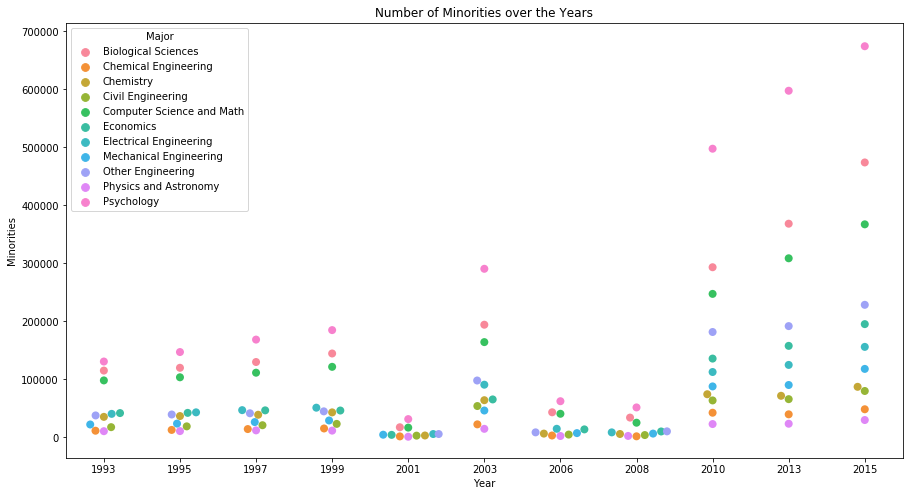

In [15]:
plt.figure(figsize = (15,8))
g = sns.swarmplot(x="Year", y="Minorities", data=df, size = 8, hue = 'Major')
plt.title('Number of Minorities over the Years')
plt.show()

### 8. Distribution of race by year - Grouped bar chart

In [16]:
df1 = df[['Major', 'Year', 'Whites', 'Asians', 'Minorities']]
df1 = pd.melt(df1, ['Major', 'Year'], var_name="Race")

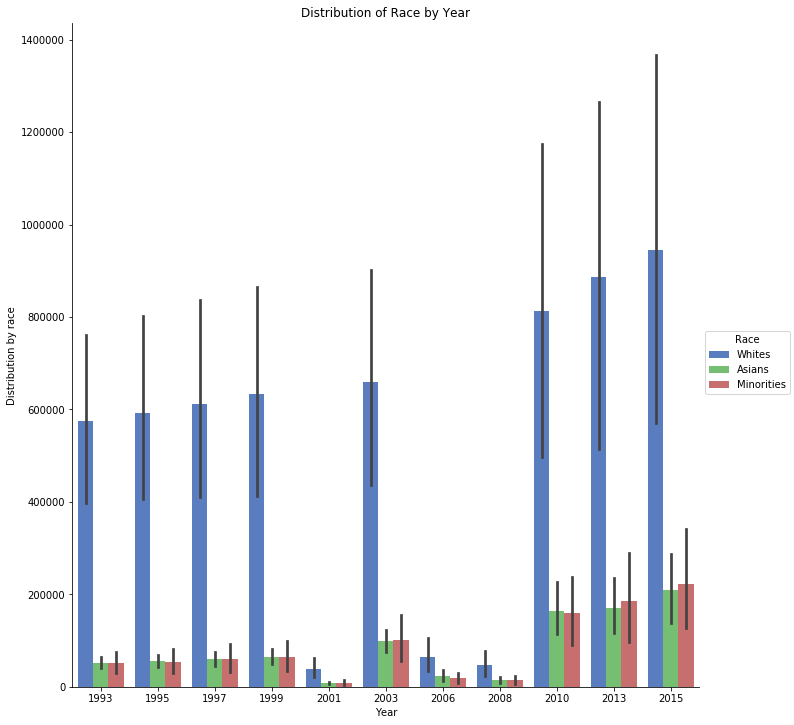

In [17]:
plt.figure(figsize=(10,20))
g = sns.factorplot(x="Year", y="value", hue="Race", data=df1, 
                   size=10, kind="bar", palette="muted", legend_out="True") # legend_out draws the legend outside the chart

g.set_ylabels("Distribution by race")
plt.title('Distribution of Race by Year')
plt.show()

From this plot also, it is evident that the number of whites is way higher than the other races, there is a steady increase in the number of non-whites that are graduating from American institutes.

### 9. Doctorates in every Major over the Years - Faceted histogram


In [18]:
# Binning the data based on years into 2 i.e. before and after 2001
df.columns
df.Major.unique()
df.Year.unique()

f = lambda x: 'new' if x.Year > 2003 else 'old'
dfc = df.copy()
dfc['old_new'] = dfc.apply(f, axis=1)

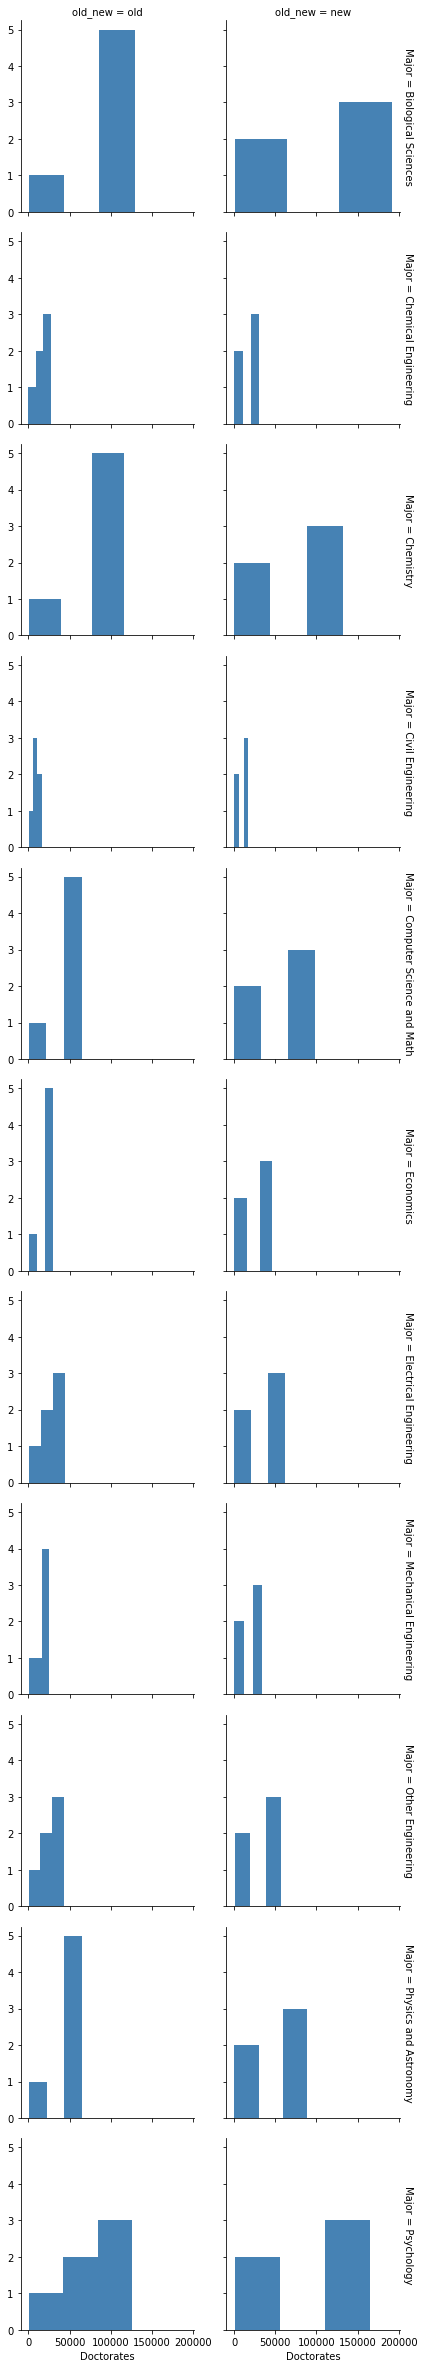

In [19]:
g = sns.FacetGrid(dfc, col="old_new", row = 'Major', margin_titles=True)
g.map(plt.hist, "Doctorates", color="steelblue",bins = 3)
plt.show() 

From this plot it can be seen that the number of people pursuing their doctorate increased quite a bit post 2003 in every field except in Chemical and Civil Engineering. The most significant increase was in Biological Sciences.